# FFT Convolution and other things

There are two points I want to address in this notebook:

1. FFT convolution and zero padding
2. reflection and conjugation
---
1. http://dsp.stackexchange.com/questions/736/how-do-i-implement-cross-correlation-to-prove-two-audio-files-are-similar
2. http://www.dspguide.com/ch18/2.htm

In [11]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## FFT convolution and zero padding

FFT convolution is a little more complicated than the mathematical formula would suggest. Mathematically we have $f \otimes g = \mathcal{F}^{-1}(F \times G)$ where $\mathcal{F}$ represents the fourier transform operation and $f$ and $F$ and $g$ and $G$ are fourier transform pairs.

However, when we perform the calculation numerically we have to remember that our signal is _not_ infinite and that in fact we are performing a _circular convolution_[1, 2]. That means that we have to pad our signal and kernel with enough zeros that this doesn't happen. I haven't been doing this with most of my FFT convolutions. But because I'ave been using small kernels (PSFs are small) and shifting them to begin with I haven't noticed the effect.

## Reflection and conjugation

One other issue that I've come across is that Fourier transforming a signal, taking the conjugate and then inverse Fourier Transformation doesn't reverse the signal, exactly, as it should. It's one sample off.

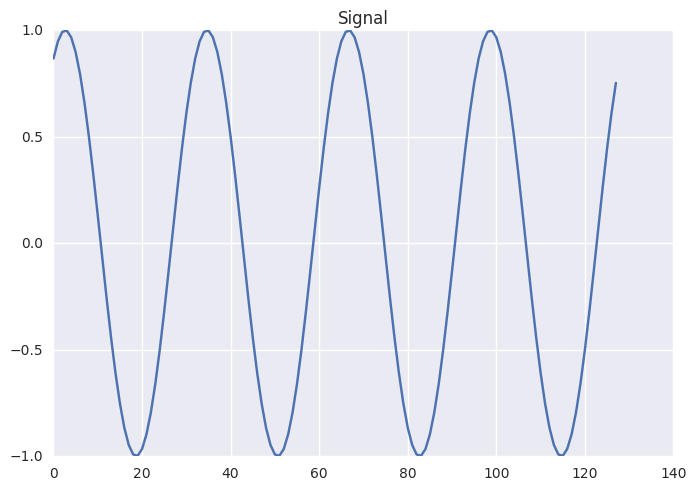

In [12]:
x = arange(128)
y = sin(2 * pi * x / 128 * 4 + pi / 3)
plot(y)
title("Signal")

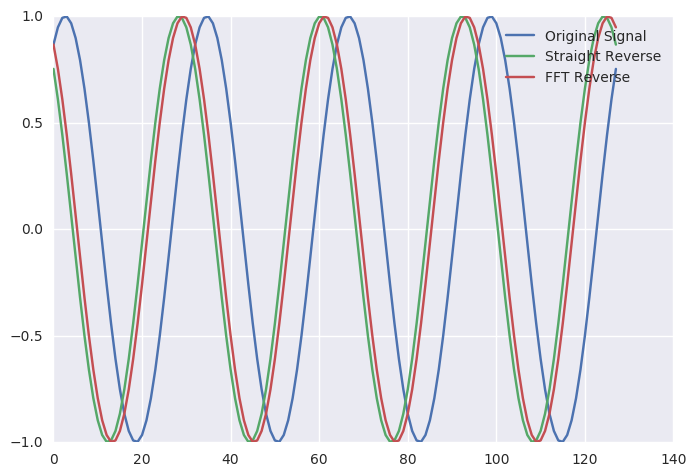

In [15]:
y_rev = y[::-1]
y_rev_fft = irfft(conj(rfft(y)))

plot(y, label="Original Signal")
plot(y_rev, label="Straight Reverse")
plot(y_rev_fft, label="FFT Reverse")
# plot(roll(y_rev_fft, -1), label="FFT Reverse Shift -1")
legend()
savefig("FFT Conjugation Reversal.png")

As you can see the conjugated version _does_ reverse the signal but it is off by one sample. Why is this?

I posed this question on [stackexchange](http://dsp.stackexchange.com/questions/35088/fourier-transform-gives-unexpected-results-signal-reversal-and-conjugation)